In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd
import math
from skimage import filters
from skimage import feature
#from keras.preprocessing.image import ImageDataGenerator
dim=(100,100)

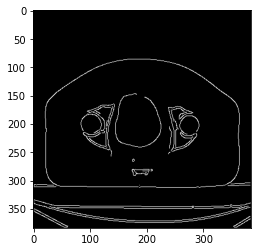

In [2]:
a=cv2.imread("CT/"+str(1)+".jpeg")
b=cv2.imread("MRI/"+str(1)+".jpeg")
c=plt.imread("RESULT/"+str(1)+".tif")

# MRI - CT images
ct_images = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
mr_images = cv2.cvtColor(b, cv2.COLOR_BGR2GRAY)

#Features1
edge_sobel_mr = filters.sobel(mr_images).reshape(-1,1)
edge_sobel_ct=filters.sobel(ct_images).reshape(-1,1)

#Feature2
edge_mr = feature.canny(mr_images).reshape(-1,1)
edge_ct=feature.canny(ct_images).reshape(-1,1)


ct_images = ct_images.reshape(-1,1)
mr_images = mr_images.reshape(-1,1)
result_images = cv2.cvtColor(c, cv2.COLOR_BGR2GRAY).reshape(-1,1)

plt.imshow(edge_ct.reshape(384,384),cmap="gray")




In [3]:

for i in range(2,6):
    a=cv2.imread("CT/"+str(i)+".jpeg")
    b=cv2.imread("MRI/"+str(i)+".jpeg")
    c=plt.imread("RESULT/"+str(i)+".tif")
    
    
    a = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
    b = cv2.cvtColor(b, cv2.COLOR_BGR2GRAY)
    c = cv2.cvtColor(c, cv2.COLOR_BGR2GRAY).reshape(-1,1)
    
    #Features1
    d = filters.sobel(b).reshape(-1,1)
    e=filters.sobel(a).reshape(-1,1)

    #Feature2
    g = feature.canny(b).reshape(-1,1)
    h=feature.canny(a).reshape(-1,1)
    
    a=a.reshape(-1,1)
    b=b.reshape(-1,1)
    
    ct_images=np.concatenate((ct_images, a), axis=0)
    mr_images=np.concatenate((mr_images, b), axis=0)
    result_images=np.concatenate((result_images, c), axis=0)   
    
    edge_sobel_mr=np.concatenate((edge_sobel_mr, d), axis=0)
    edge_sobel_ct=np.concatenate((edge_sobel_ct, e), axis=0)
    
    edge_mr=np.concatenate((edge_mr, g), axis=0)
    edge_ct=np.concatenate((edge_ct, h), axis=0)
    
    

print(ct_images.shape)
print(mr_images.shape)
print(result_images.shape)

(737280, 1)
(737280, 1)
(737280, 1)


In [4]:
X=np.concatenate((ct_images, mr_images,edge_sobel_mr,edge_sobel_ct,edge_mr,edge_ct), axis=1)
y=result_images

In [5]:
X.shape



(737280, 6)

In [6]:
y.shape

(737280, 1)

In [7]:
test_x2=cv2.imread("MRI/2.jpeg") 
test_x=cv2.imread("CT/2.jpeg") 


#Test images
test_x = cv2.cvtColor(test_x, cv2.COLOR_BGR2GRAY)
test_x2 = cv2.cvtColor(test_x2, cv2.COLOR_BGR2GRAY)

#Feature Extraction 1
feature1_mr = filters.sobel(test_x2).reshape(-1,1)
feature1_ct=filters.sobel(test_x).reshape(-1,1)

#Feature Extraction 2
feature2_mr = feature.canny(test_x2).reshape(-1,1)
feature2_ct=feature.canny(test_x).reshape(-1,1)





test_x = test_x.reshape(-1,1)
test_x2 = test_x2.reshape(-1,1)

  



#(ct_images, mr_images,edge_sobel_mr,edge_sobel_ct)
test=np.concatenate((test_x, test_x2,feature1_mr,feature1_ct,feature2_mr,feature2_ct), axis=1)

test_result=plt.imread("RESULT/2.tif")   
test_result = cv2.cvtColor(test_result, cv2.COLOR_BGR2GRAY).reshape(-1,1)

In [8]:
test.shape

(147456, 6)

In [9]:
test_result.shape

(147456, 1)

In [10]:
import keras
from keras.layers import Dense
from keras.models import Sequential

import pandas as pd
from sklearn import preprocessing




classifier=Sequential()
classifier.add(Dense(12, activation="relu",input_dim=6))
classifier.add(Dense(8, activation="relu"))
classifier.add(Dense(6, activation="relu"))
classifier.add(Dense(3, activation="relu"))
classifier.add(Dense(6, activation="relu"))
classifier.add(Dense(8, activation="relu"))
classifier.add(Dense(1, activation="relu"))

classifier.compile(optimizer="adam",loss="mean_absolute_error",metrics=["accuracy"])

classifier.fit(X,y,epochs=25,batch_size=120,validation_data=(test,test_result))



Epoch 1/25
6144/6144 [==============================] - 6s 1ms/step - loss: 12.0068 - accuracy: 0.5920 - val_loss: 10.5452 - val_accuracy: 0.6018
Epoch 2/25
6144/6144 [==============================] - 6s 989us/step - loss: 11.4435 - accuracy: 0.6034 - val_loss: 8.8849 - val_accuracy: 0.6018
Epoch 3/25
6144/6144 [==============================] - 6s 941us/step - loss: 10.6179 - accuracy: 0.6042 - val_loss: 7.9631 - val_accuracy: 0.6062
Epoch 4/25
6144/6144 [==============================] - 6s 1ms/step - loss: 9.9187 - accuracy: 0.6058 - val_loss: 7.8531 - val_accuracy: 0.6063
Epoch 5/25
6144/6144 [==============================] - 6s 1ms/step - loss: 9.5482 - accuracy: 0.6052 - val_loss: 7.6654 - val_accuracy: 0.6056
Epoch 6/25
6144/6144 [==============================] - 7s 1ms/step - loss: 9.4125 - accuracy: 0.6049 - val_loss: 7.9155 - val_accuracy: 0.6050
Epoch 7/25
6144/6144 [==============================] - 6s 902us/step - loss: 9.3389 - accuracy: 0.6052 - val_loss: 8.5114 - val

In [11]:
y_pred=classifier.predict(test)
y_pred.shape

(147456, 1)

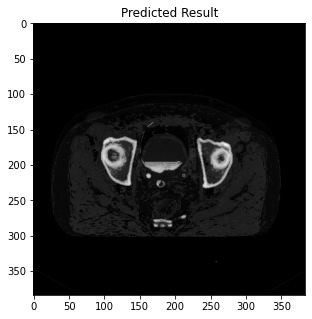

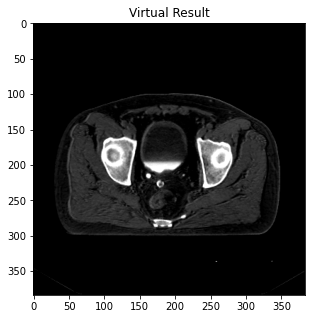

In [12]:
size=int(math.sqrt(len(y_pred)))
plt.figure(figsize=(5,5))
plt.title("Predicted Result")
plt.imshow(y_pred.reshape(384,384),cmap="gray")
plt.show()

plt.figure(figsize=(5,5))
plt.title("Virtual Result")
plt.imshow(test_result.reshape(384,384),cmap="gray")
plt.show()

In [13]:
print(np.unique(y_pred))

[0.0000000e+00 3.3372641e-04 1.2535453e-03 ... 2.9319519e+02 2.9810535e+02
 3.0322092e+02]


In [14]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_result, y_pred)

8.7780075

In [15]:
#classifier.save("best_result.h5")

In [16]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                84        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 21        
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 24        
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 56        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 9